# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5], [0.5])])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

c:\Users\User\.conda\envs\torch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


With the data loaded, it's time to import the necessary packages.

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time
from collections import OrderedDict

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [15]:
# TODO: Define your network architecture here
input_size = 784
hidden_size = [256, 128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(hidden_size[1], hidden_size[2])),
    ('relu3', nn.ReLU()),
    ('logits', nn.Linear(hidden_size[2], output_size))
]))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [16]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [17]:
# TODO: Train the network here
epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten images into a vector
        images.resize_(images.size()[0], 784)

        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps%print_every == 0:
            print('Epoch: {}/{}...'.format(e+1, epochs),
                  'Loss: {:.4f}'.format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3... Loss: 2.2927
Epoch: 1/3... Loss: 2.2685
Epoch: 1/3... Loss: 2.2420
Epoch: 1/3... Loss: 2.2038
Epoch: 1/3... Loss: 2.1397
Epoch: 1/3... Loss: 2.0277
Epoch: 1/3... Loss: 1.8574
Epoch: 1/3... Loss: 1.6870
Epoch: 1/3... Loss: 1.5175
Epoch: 1/3... Loss: 1.3651
Epoch: 1/3... Loss: 1.2108
Epoch: 1/3... Loss: 1.1191
Epoch: 1/3... Loss: 1.0548
Epoch: 1/3... Loss: 0.9804
Epoch: 1/3... Loss: 0.9341
Epoch: 1/3... Loss: 0.8662
Epoch: 1/3... Loss: 0.8803
Epoch: 1/3... Loss: 0.8173
Epoch: 1/3... Loss: 0.7933
Epoch: 1/3... Loss: 0.7707
Epoch: 1/3... Loss: 0.7480
Epoch: 1/3... Loss: 0.7131
Epoch: 1/3... Loss: 0.7117
Epoch: 2/3... Loss: 0.3928
Epoch: 2/3... Loss: 0.7219
Epoch: 2/3... Loss: 0.7038
Epoch: 2/3... Loss: 0.6725
Epoch: 2/3... Loss: 0.7137
Epoch: 2/3... Loss: 0.6727
Epoch: 2/3... Loss: 0.6560
Epoch: 2/3... Loss: 0.6654
Epoch: 2/3... Loss: 0.6455
Epoch: 2/3... Loss: 0.6482
Epoch: 2/3... Loss: 0.6229
Epoch: 2/3... Loss: 0.6458
Epoch: 2/3... Loss: 0.6062
Epoch: 2/3... Loss: 0.6280
E

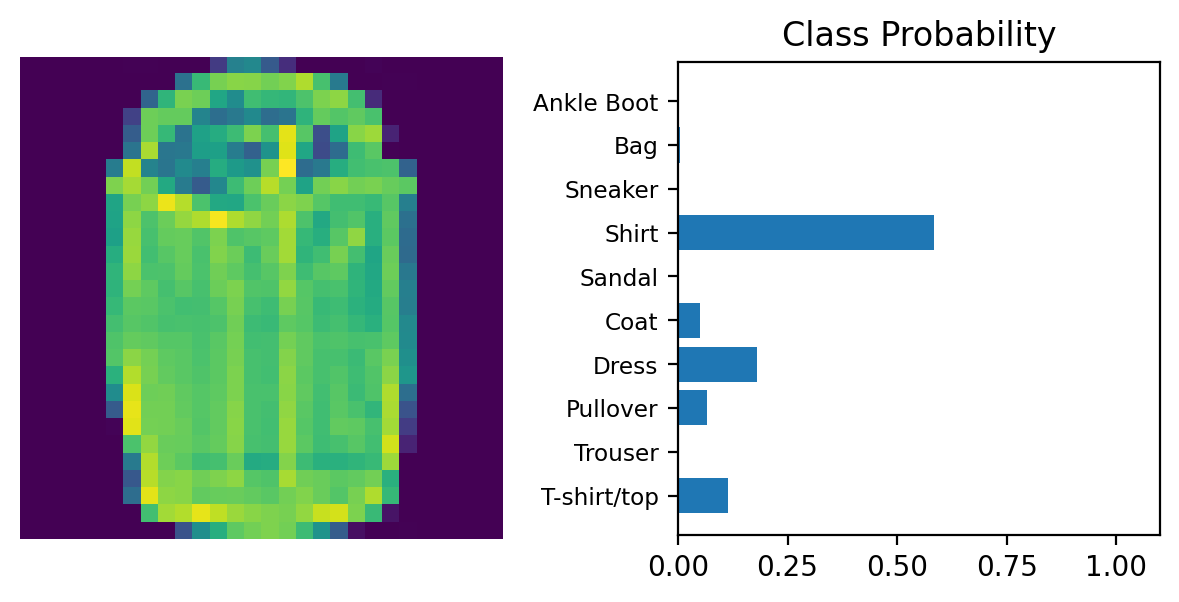

In [18]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.